In [1]:
from pyqae.images.pipelines import WrappedChannelTransform, visualize_pipeline
from pyqae.images.pipelines import flatten_transform, add_position_transform, add_normpos_transform, normalize_transform

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np

kmeans - (1, 5)
kclass - (1, 5)


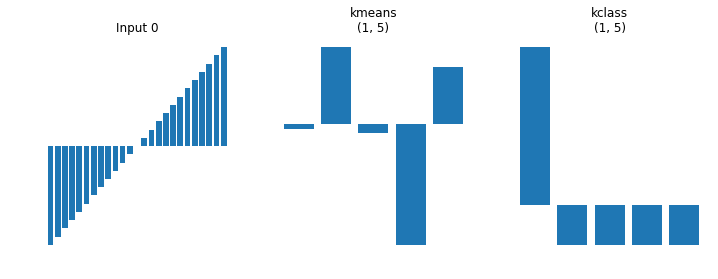

In [3]:
%matplotlib inline
std_pipe = Pipeline([
                   ('kmeans',KMeans(5)),
                   ('kclass',KNeighborsClassifier(1))])
std_pipe.fit(np.random.normal(size=(100,25)),np.random.choice(range(5),size=(100)))
_=visualize_pipeline(std_pipe, np.arange(25).reshape((1,25)),True)

flatten - (1, 25)
kmeans - (1, 5)
kclass - (1, 5)


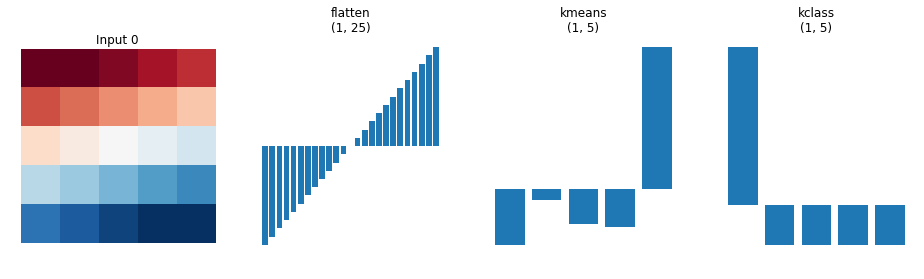

In [4]:
t_pipe = Pipeline([('flatten',flatten_transform()),
                   ('kmeans',KMeans(5)),
                   ('kclass',KNeighborsClassifier(1))])
t_pipe.fit(np.random.normal(size=(100,1,5,5)),np.random.choice(range(5),size=(100)))
_=visualize_pipeline(t_pipe, np.arange(25).reshape((1,1,5,5)),True)

In [5]:
ni_pipe = Pipeline([
        ('Pos',add_position_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(8),'th',use_predict=True)),
        ('Flatten',flatten_transform()),
                   ('PCA',PCA(n_components=2)),
                   ('kclass',KNeighborsClassifier(1))])
ni_pipe.fit(np.linspace(0,180,18000).reshape((100,20,3,3)),
            np.random.choice(range(3),size=100))

Pipeline(memory=None,
     steps=[('Pos', <pyqae.images.pipelines.ChannelPipeTransform object at 0x7fec50180160>), ('KMeans', <pyqae.images.pipelines.WrappedChannelTransform object at 0x7fec501803c8>), ('Flatten', <pyqae.images.pipelines.ImmutablePipeTransform object at 0x7fec50180470>), ('PCA', PCA(copy=True, iterated_power=...owski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

Pos - (1, 22, 3, 3)
KMeans - (1, 1, 3, 3)
Flatten - (1, 9)
PCA - (1, 2)
kclass - (1, 3)


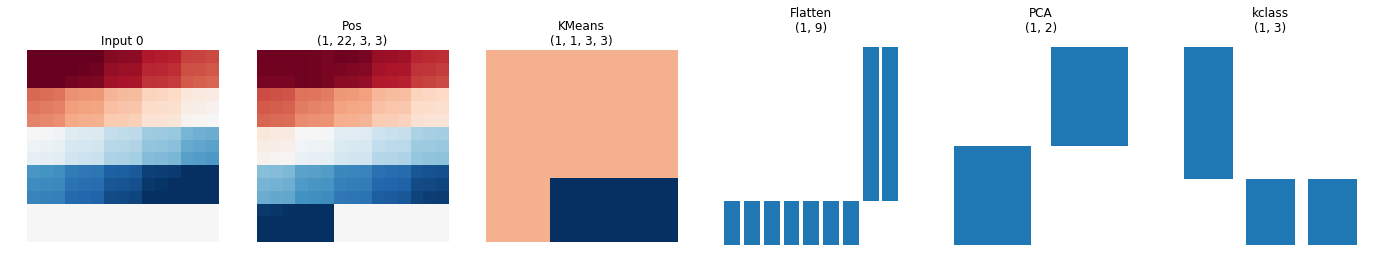

In [6]:
_=visualize_pipeline(ni_pipe,np.arange(180).reshape((1,20,3,3)),True)

In [7]:
ni_pipe = Pipeline([
        ('pca',WrappedChannelTransform(KMeans(3),'th')),
        ('Flatten',flatten_transform()),
                   ('kmeans',PCA(n_components=2)),
                   ('kclass',KNeighborsClassifier(1))])
ni_pipe.fit(np.linspace(0,180,18000).reshape((100,20,3,3)),
            np.random.choice(range(3),size=100))

Pipeline(memory=None,
     steps=[('pca', <pyqae.images.pipelines.WrappedChannelTransform object at 0x7fec0de76748>), ('Flatten', <pyqae.images.pipelines.ImmutablePipeTransform object at 0x7fec0de767b8>), ('kmeans', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kclass', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

In [8]:
from keras.datasets import cifar10
(x_train, y_train), _ = cifar10.load_data()
print(x_train.shape, y_train.shape)

/srv/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)


In [9]:
im_idxs=np.random.permutation(range(len(x_train)))[:20]
new_im_data=x_train.swapaxes(1,3).swapaxes(2,3)
new_im_data.shape

(50000, 3, 32, 32)

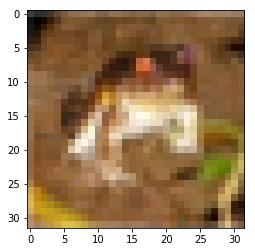

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [11]:
%%time
from sklearn.neighbors import KNeighborsClassifier
cifar_pipe = Pipeline([
        ('KMeans_Intensity',WrappedChannelTransform(KMeans(4),'th',use_predict=True)),
        ('Normalize',normalize_transform()),
        ('Pos',add_normpos_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(16),'th')),
        ('PCA_Image',WrappedChannelTransform(PCA(n_components=9),'th')),
        ('Flatten',flatten_transform()),
        ('PCA',PCA(n_components=100)),
        ('kregress',KNeighborsClassifier(3))])
cifar_pipe.fit(new_im_data[im_idxs],y_train[im_idxs])

CPU times: user 3.95 s, sys: 6.94 s, total: 10.9 s
Wall time: 5.76 s


/srv/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


KMeans_Intensity - (1, 1, 32, 32)
Normalize - (1, 1, 32, 32)
Pos - (1, 3, 32, 32)
KMeans - (1, 16, 32, 32)
PCA_Image - (1, 9, 32, 32)
Flatten - (1, 9216)
PCA - (1, 20)
kregress - (1, 7)
KMeans_Intensity - (1, 1, 32, 32)
Normalize - (1, 1, 32, 32)
Pos - (1, 3, 32, 32)
KMeans - (1, 16, 32, 32)
PCA_Image - (1, 9, 32, 32)
Flatten - (1, 9216)
PCA - (1, 20)
kregress - (1, 7)


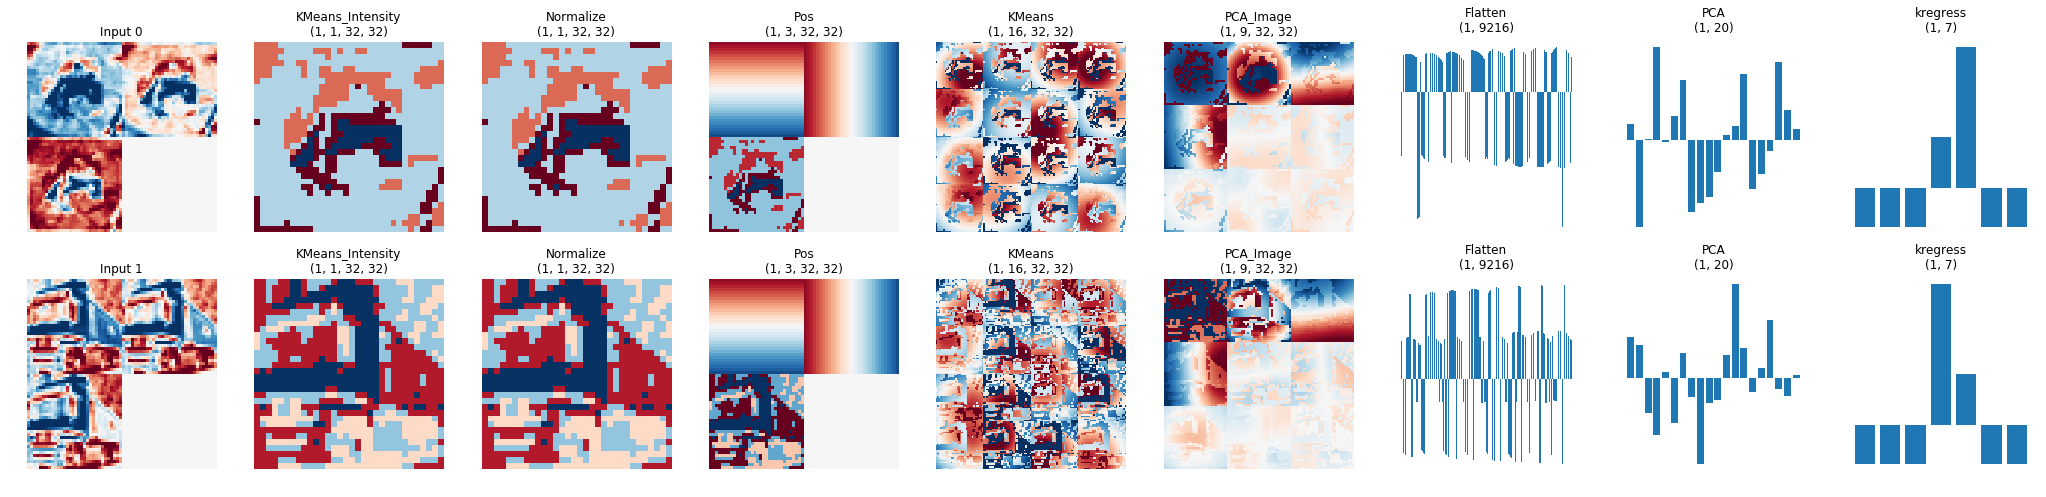

In [12]:
_=visualize_pipeline(cifar_pipe, new_im_data[0:2], True)

In [13]:
cifar_pipe.predict(new_im_data[50:51])

array([0], dtype=uint8)

# Segmentation

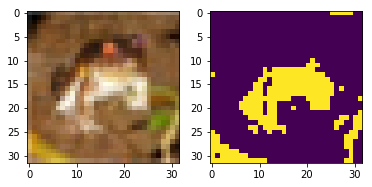

In [14]:
_, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(x_train[0])
ax2.imshow(x_train[0,:,:,1]>127)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

cifar_seg_pipe = Pipeline([
        ('KMeans_Intensity',WrappedChannelTransform(KMeans(4),'th',use_predict=True)),
        ('Normalize',normalize_transform()),
        ('Pos',add_normpos_transform(False,'th')),
        ('KMeans',WrappedChannelTransform(KMeans(16),'th')),
        ('PCA_Image',WrappedChannelTransform(PCA(n_components=9),'th')),
        ('kregress',WrappedChannelTransform(KNeighborsRegressor(2),'th',use_predict=True, flatten_y=True, class_predict=False))
    ])

In [16]:
%%time
train_ids=np.random.permutation(range(len(new_im_data)))

c_idx = np.random.choice(train_ids, 10)
x_data = new_im_data[c_idx]
y_data = np.expand_dims(x_data[:,1,:,:]>127, 1)
print(x_train.shape,y_train.shape)
cifar_seg_pipe.fit(x_data,y_data)

(50000, 32, 32, 3) (50000, 1)
CPU times: user 2.89 s, sys: 5.57 s, total: 8.46 s
Wall time: 4.66 s


KMeans_Intensity - (1, 1, 32, 32)
Normalize - (1, 1, 32, 32)
Pos - (1, 3, 32, 32)
KMeans - (1, 16, 32, 32)
PCA_Image - (1, 9, 32, 32)
kregress - (1, 1, 32, 32)
KMeans_Intensity - (1, 1, 32, 32)
Normalize - (1, 1, 32, 32)
Pos - (1, 3, 32, 32)
KMeans - (1, 16, 32, 32)
PCA_Image - (1, 9, 32, 32)
kregress - (1, 1, 32, 32)


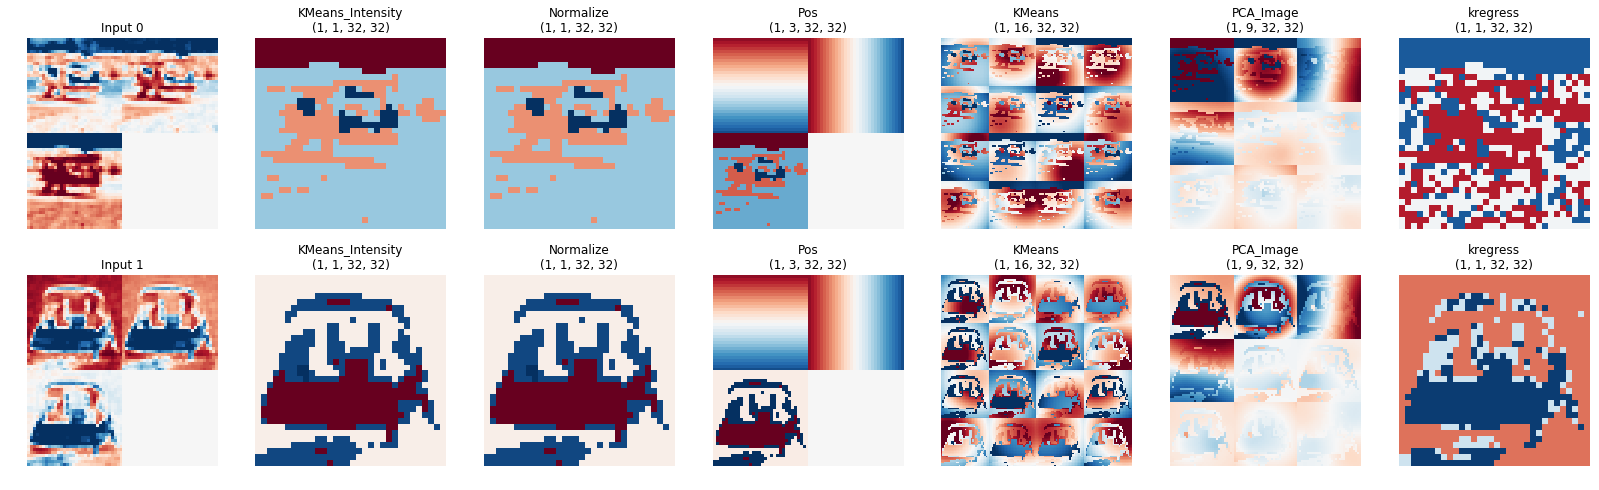

In [17]:
_=visualize_pipeline(cifar_seg_pipe, x_data[0:2], True)